# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [34]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [35]:
df = pd.read_csv('/Users/mikeb/Documents/Flatiron/AD02/lab/dsc-course0-m8-lab/data/AviationData_Cleaned.csv', 
                 encoding='latin-1',
                 low_memory=False)

In [36]:
print(df.head(100))

          Event.Id Investigation.Type Accident.Number  Event.Date  \
0   20001214X42478           Incident     LAX83IA149B  1983-03-18   
1   20001214X42478           Incident     LAX83IA149A  1983-03-18   
2   20001214X42331           Accident      ATL83FA140  1983-03-20   
3   20001214X42672           Accident      FTW83LA177  1983-04-02   
4   20001214X44248           Incident      MIA83IA210  1983-08-21   
..             ...                ...             ...         ...   
95  20001211X16199           Accident      LAX93WA090  1992-12-29   
96  20001211X12054           Accident      ANC93FA054  1993-04-23   
97  20001211X13214           Accident      NYC93FA154  1993-08-14   
98  20001211X13180           Accident      LAX93LA329  1993-08-18   
99  20001211X13402           Accident      FTW93LA257  1993-09-04   

             Location        Country Injury.Severity Aircraft.damage  \
0     LOS ANGELES, CA  United States        Incident           Minor   
1     LOS ANGELES, CA  Unit

In [37]:
headers = df.columns.tolist()

for value in headers:
    print(value)

Event.Id
Investigation.Type
Accident.Number
Event.Date
Location
Country
Injury.Severity
Aircraft.damage
Aircraft.Category
Registration.Number
Make
Model
Amateur.Built
Number.of.Engines
Engine.Type
FAR.Description
Purpose.of.flight
Total.Fatal.Injuries
Total.Serious.Injuries
Total.Minor.Injuries
Total.Uninjured
Weather.Condition
Broad.phase.of.flight
Publication.Date
Total.Passengers
Aircraft.destroyed
Make.Model


In [29]:
# Length of dataframe
len(df) # 21447 records prior to filtering

21447

In [38]:
# Remove records with zero passengers

df = df[df['Total.Passengers'] > 0]
len(df) # 20543 records after filtering

20543

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [39]:
# Broad.phase.of.flight

# Column to analyze
col_name = 'Total.Passengers'

# Count occurrences of each unique value sorted by the value
value_counts = df[col_name].value_counts().sort_index()

# sort by counts in descending order
#value_counts = df[col_name].value_counts().sort_values(ascending=False)

# Print each value and its count
for value, count in value_counts.items():
    print(f"{value}: {count}")

1.0: 9062
2.0: 6740
3.0: 1642
4.0: 1098
5.0: 348
6.0: 207
7.0: 141
8.0: 70
9.0: 66
10.0: 52
11.0: 18
12.0: 27
13.0: 20
14.0: 15
15.0: 10
16.0: 10
17.0: 6
18.0: 11
19.0: 6
20.0: 6
21.0: 4
22.0: 5
23.0: 4
24.0: 6
25.0: 2
26.0: 6
27.0: 5
28.0: 4
29.0: 2
30.0: 3
31.0: 4
32.0: 5
33.0: 5
34.0: 5
35.0: 2
36.0: 4
37.0: 7
38.0: 4
39.0: 6
40.0: 4
41.0: 6
42.0: 1
43.0: 1
44.0: 4
45.0: 4
46.0: 3
47.0: 5
48.0: 6
49.0: 6
50.0: 5
51.0: 9
52.0: 6
53.0: 17
54.0: 4
55.0: 5
56.0: 4
57.0: 3
58.0: 2
59.0: 2
61.0: 4
62.0: 2
63.0: 4
64.0: 4
65.0: 3
66.0: 7
67.0: 4
68.0: 1
69.0: 3
70.0: 2
71.0: 3
72.0: 1
73.0: 5
74.0: 3
75.0: 3
76.0: 5
77.0: 4
78.0: 1
79.0: 2
80.0: 7
81.0: 4
82.0: 1
83.0: 2
84.0: 4
85.0: 2
86.0: 5
87.0: 2
88.0: 4
89.0: 2
90.0: 3
91.0: 3
92.0: 2
93.0: 2
94.0: 2
95.0: 2
96.0: 5
97.0: 3
98.0: 3
99.0: 6
100.0: 6
101.0: 5
102.0: 8
103.0: 5
104.0: 4
105.0: 1
106.0: 2
107.0: 3
108.0: 6
109.0: 3
110.0: 4
111.0: 3
112.0: 7
113.0: 6
114.0: 4
115.0: 5
116.0: 4
117.0: 3
118.0: 2
119.0: 6
120.0: 5
121.0: 

In [40]:
# Create Size.Airplane using 20 or more passengers as threshold for "Large", else "Small"
df['Size.Airplane'] = np.where(df['Total.Passengers'] >= 20, 'Large','Small')

# Verify
print(df[['Total.Passengers', 'Size.Airplane']].head())

   Total.Passengers Size.Airplane
0             588.0         Large
1             588.0         Large
2               2.0         Small
3               5.0         Small
4             289.0         Large


#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [47]:
# Create a combined fatal.serious.total injury column
df['Fatal.Serious.Total'] = (df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'])

# Aggregate totals by Size.Airplane and Make
size_make_totals = (df.groupby(['Size.Airplane', 'Make']).agg({'Total.Passengers': 'sum', 'Fatal.Serious.Total': 'sum'}).reset_index())

# Calculate fatal/serious percentage
size_make_totals['Fatal.Serious.Percentage'] = (size_make_totals['Fatal.Serious.Total'] / size_make_totals['Total.Passengers'])

# Select 15 lowest percentages per Size.Airplane
lowest_15 = (size_make_totals.sort_values(['Size.Airplane', 'Fatal.Serious.Percentage']).groupby('Size.Airplane').head(15).reset_index(drop=True))

# Check results
print(lowest_15)

   Size.Airplane                          Make  Total.Passengers  \
0          Large                           737             329.0   
1          Large                           bae             183.0   
2          Large    boeing of canada/dehav div              33.0   
3          Large             british aerospace              41.0   
4          Large                        cessna             179.0   
5          Large                   dehavilland              58.0   
6          Large  embraerempresa brasileira de             412.0   
7          Large                       grumman              69.0   
8          Large                    gulfstream              26.0   
9          Large                       learjet              50.0   
10         Large                         piper              52.0   
11         Large                    saabscania              31.0   
12         Large          saabscania ab (saab)              91.0   
13         Large                    the boeing  

# Results

- When sorting this way, we see that there are multiple makes within both the large and small Size.Airplane groups that had zero fatal or seirous injuries.  
   - Whith the Large Airplanes, `short brothers` was the only Make that had any serious injuries (1 total) equating to a 0.00271 percentage
   - There were no Small Airplane Makes with any serious injuries

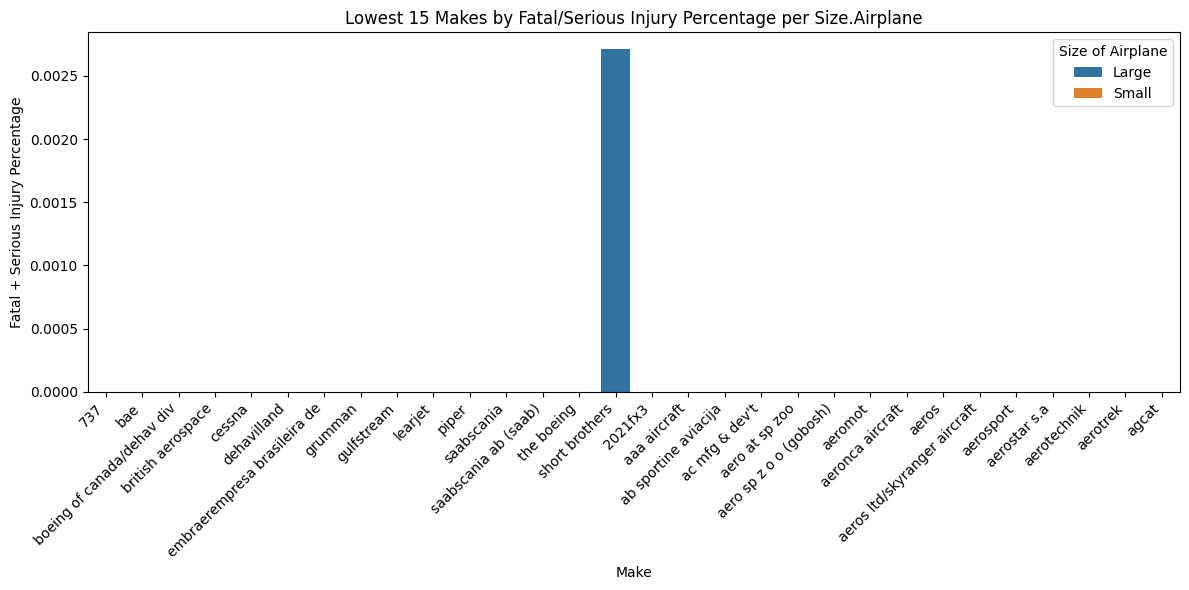

In [52]:
# Create figure
plt.figure(figsize=(12, 6))

# Side-by-side bar plot
sns.barplot(
    data=lowest_15,
    x='Make',
    y='Fatal.Serious.Percentage',
    hue='Size.Airplane'
)

# Labels and title
plt.xticks(rotation=45, ha='right')
plt.ylabel('Fatal + Serious Injury Percentage')
plt.xlabel('Make')
plt.title('Lowest 15 Makes by Fatal/Serious Injury Percentage per Size.Airplane')
plt.legend(title='Size of Airplane')
plt.tight_layout()

plt.show()

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.